# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../data/Part01/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
dtype_select = [float, int]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
print(numeric_columns[0:10])

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']


In [4]:
app_train.columns['SK_ID_CURR', 'TARGET'] # 作為index的篩選器，需要使用series形態的boolean來篩選，不能直接指定欄位名稱這種做法
list(app_train.dtypes.isin(dtype_select)) # 這個出來的結果是一個boolean值清單list

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
app_train[numeric_columns].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 這邊的apply()使用預設，將lambda function做在每一個欄位上（axis=0），且結果是boolean值
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %s" % len(numeric_columns))


Numbers of remain columns 73


Numbers of remain columns 73
SK_ID_CURR is 100002 ~ 456255 , and median is 278202.0


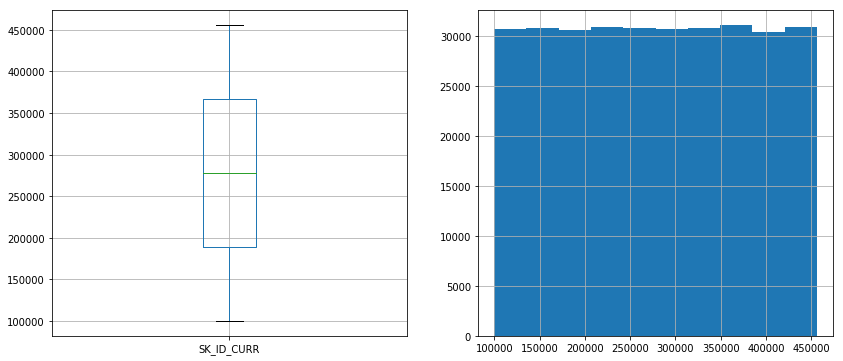

CNT_CHILDREN is 0 ~ 19 , and median is 0.0


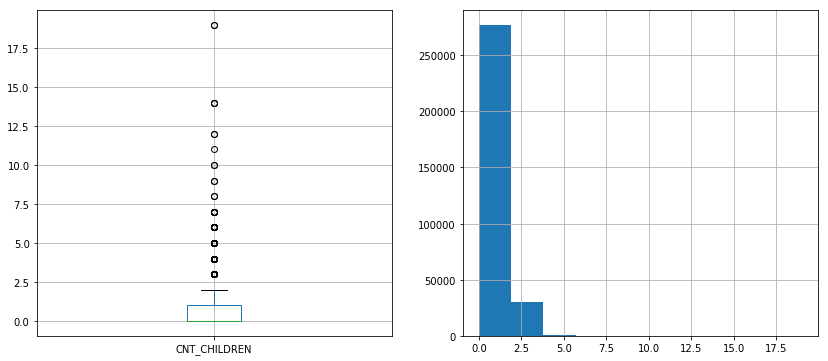

AMT_INCOME_TOTAL is 25650.0 ~ 117000000.0 , and median is 147150.0


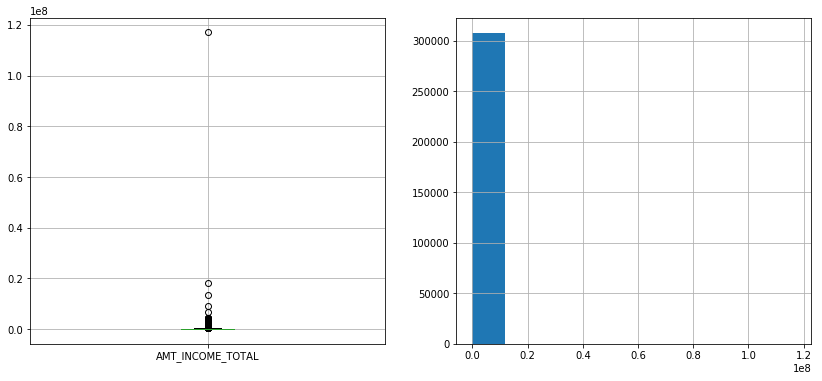

AMT_CREDIT is 45000.0 ~ 4050000.0 , and median is 513531.0


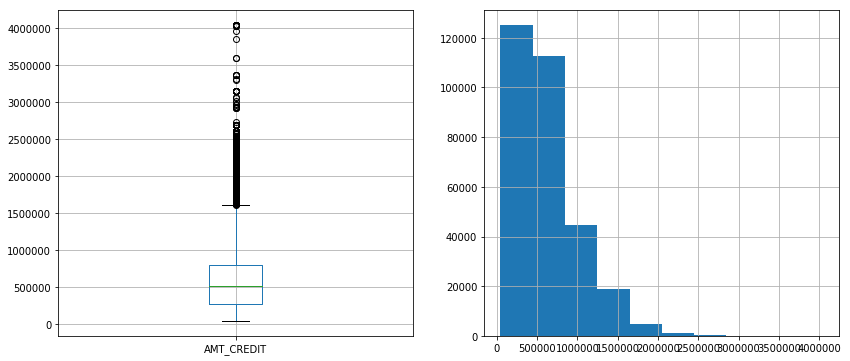

AMT_ANNUITY is 1615.5 ~ 258025.5 , and median is 24903.0


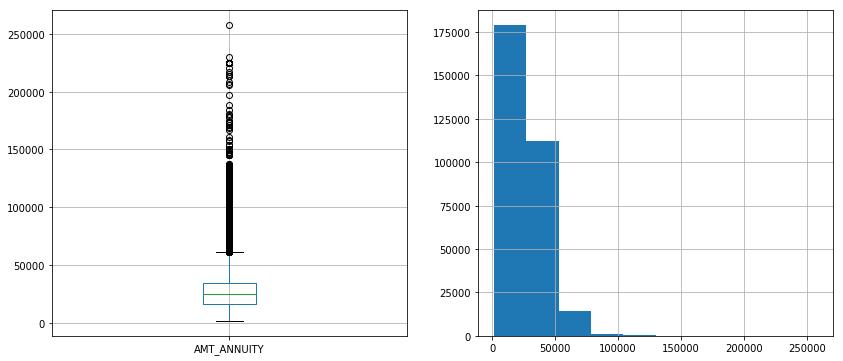

AMT_GOODS_PRICE is 40500.0 ~ 4050000.0 , and median is 450000.0


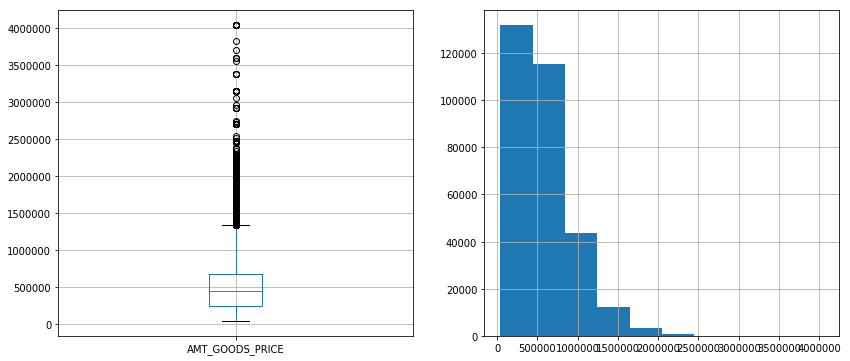

REGION_POPULATION_RELATIVE is 0.00029 ~ 0.072508 , and median is 0.01885


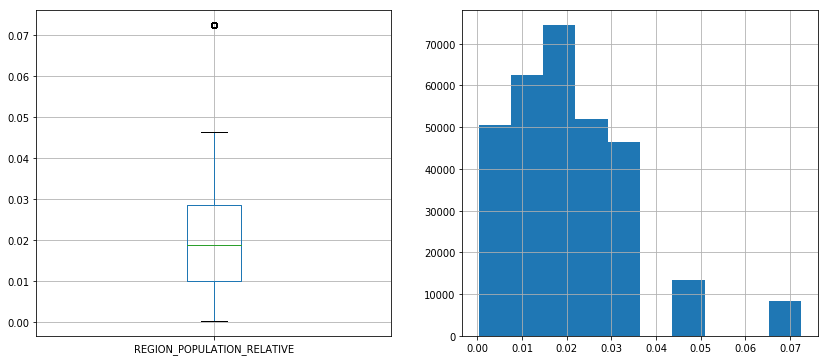

DAYS_BIRTH is -25229 ~ -7489 , and median is -15750.0


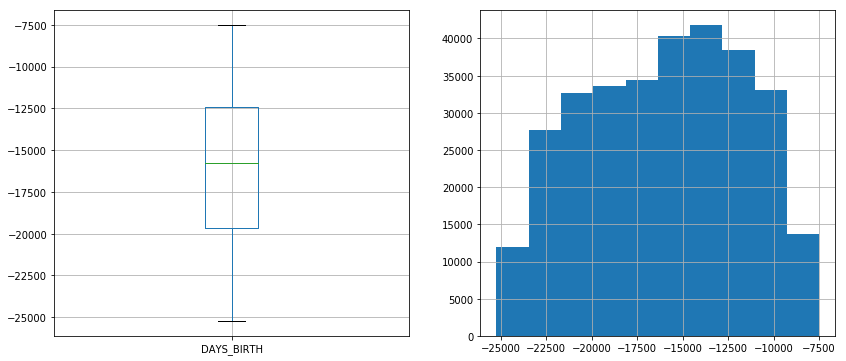

DAYS_EMPLOYED is -17912 ~ 365243 , and median is -1213.0


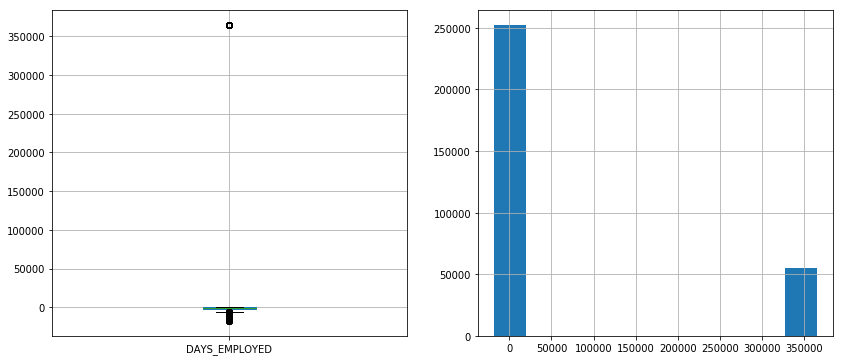

DAYS_REGISTRATION is -24672.0 ~ 0.0 , and median is -4504.0


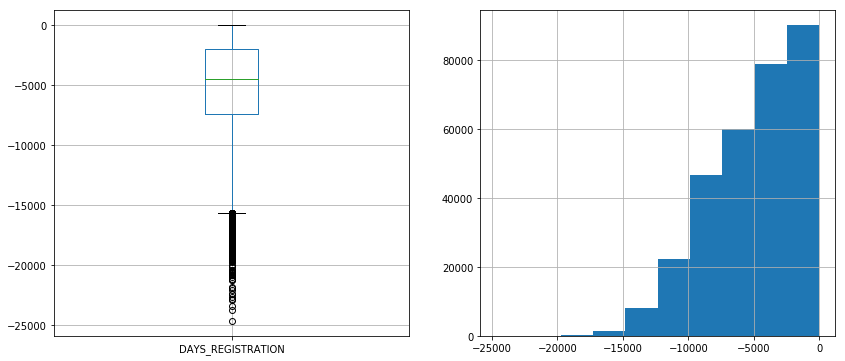

DAYS_ID_PUBLISH is -7197 ~ 0 , and median is -3254.0


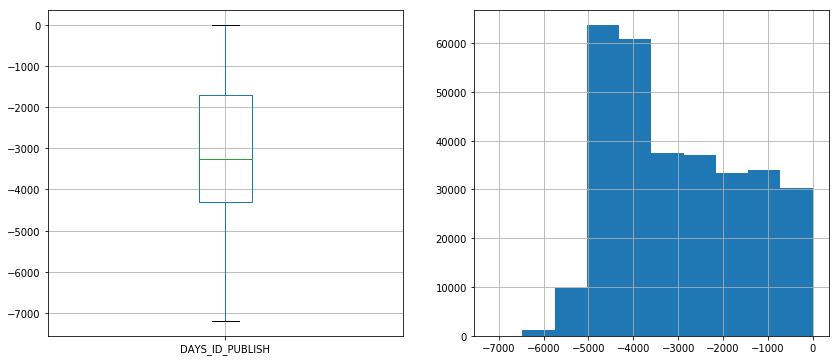

OWN_CAR_AGE is 0.0 ~ 91.0 , and median is 9.0


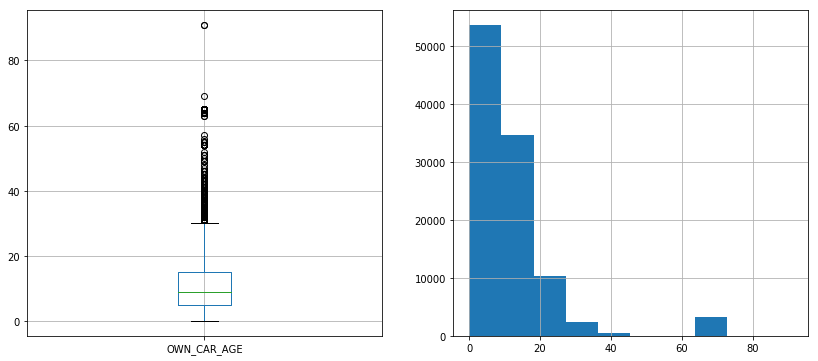

CNT_FAM_MEMBERS is 1.0 ~ 20.0 , and median is 2.0


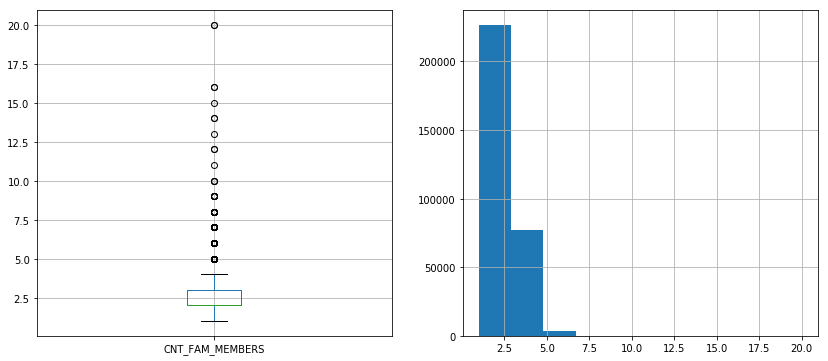

REGION_RATING_CLIENT is 1 ~ 3 , and median is 2.0


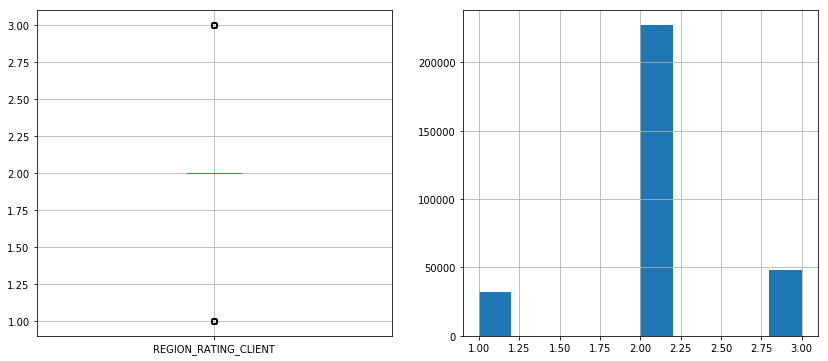

REGION_RATING_CLIENT_W_CITY is 1 ~ 3 , and median is 2.0


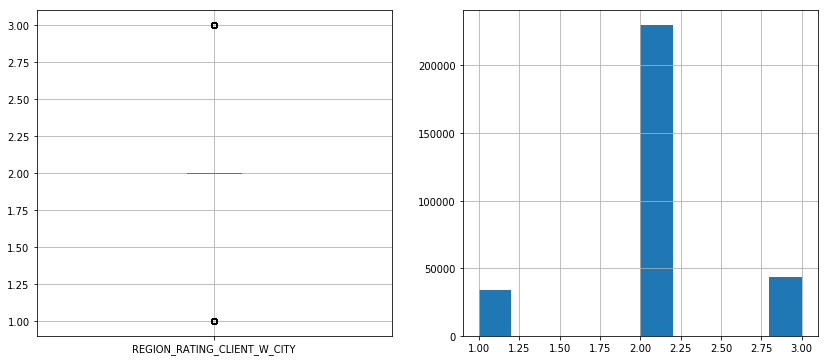

HOUR_APPR_PROCESS_START is 0 ~ 23 , and median is 12.0


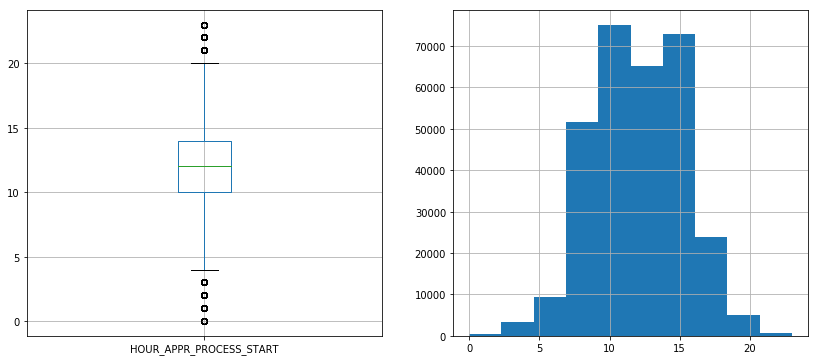

EXT_SOURCE_1 is 0.014568132412445587 ~ 0.962692770561306 , and median is 0.5059979305057544


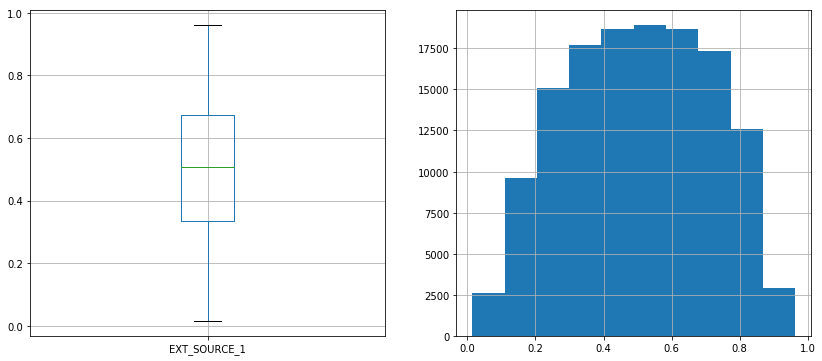

EXT_SOURCE_2 is 8.173616518884397e-08 ~ 0.8549996664047012 , and median is 0.5659614260608526


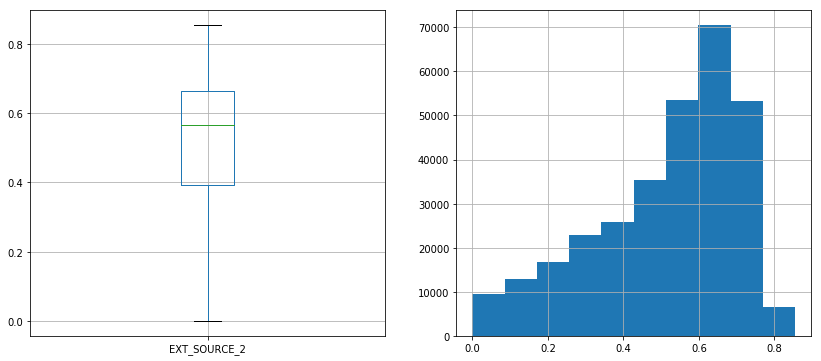

EXT_SOURCE_3 is 0.0005272652387098817 ~ 0.8960095494948396 , and median is 0.5352762504724826


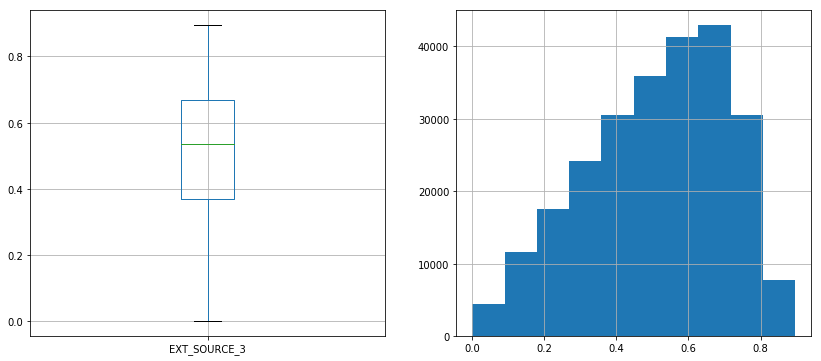

APARTMENTS_AVG is 0.0 ~ 1.0 , and median is 0.0876


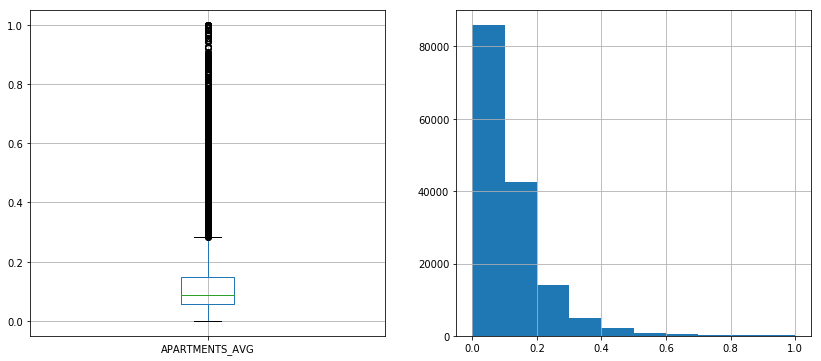

BASEMENTAREA_AVG is 0.0 ~ 1.0 , and median is 0.0763


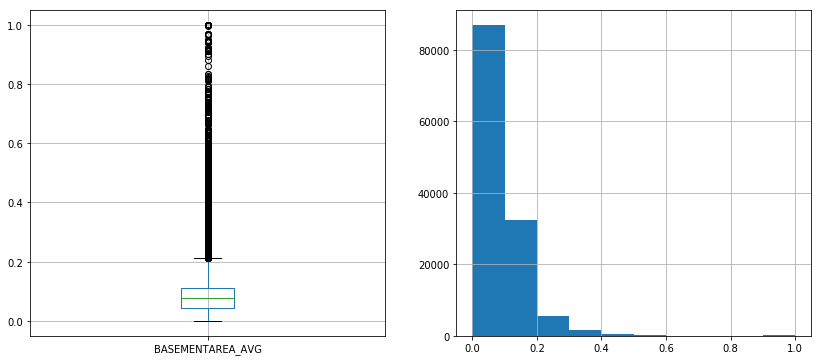

YEARS_BEGINEXPLUATATION_AVG is 0.0 ~ 1.0 , and median is 0.9816


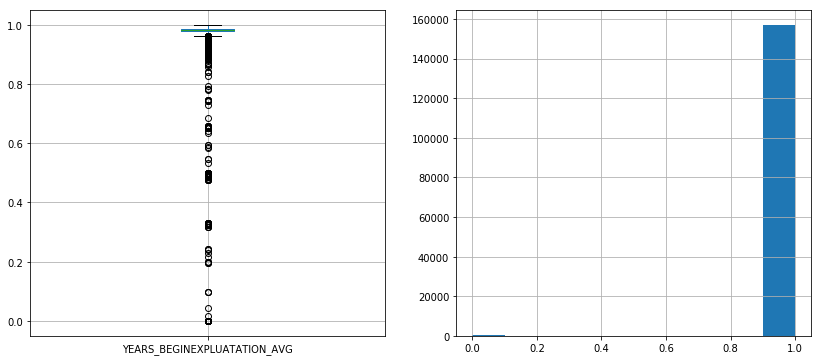

YEARS_BUILD_AVG is 0.0 ~ 1.0 , and median is 0.7552


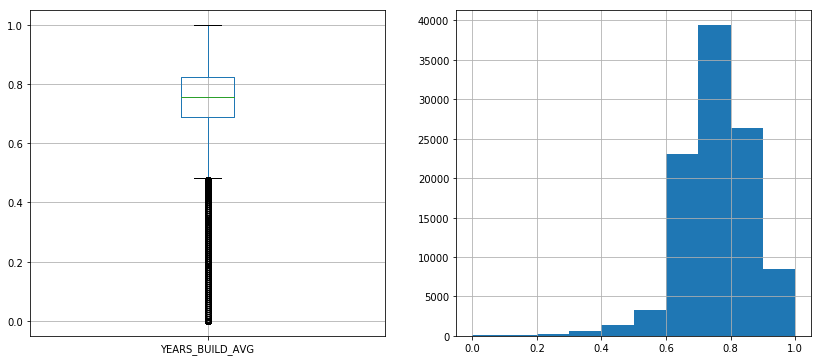

COMMONAREA_AVG is 0.0 ~ 1.0 , and median is 0.0211


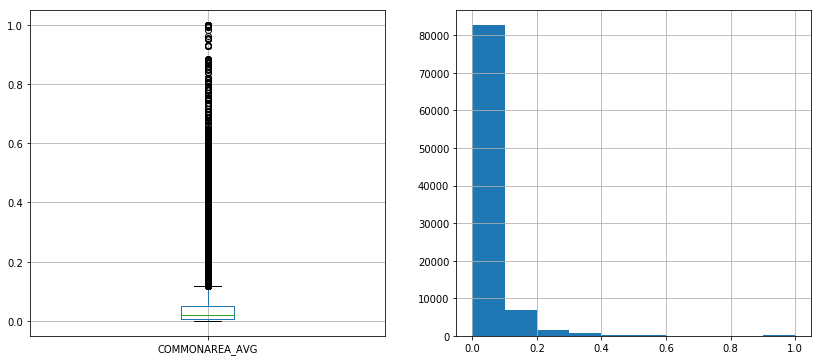

ELEVATORS_AVG is 0.0 ~ 1.0 , and median is 0.0


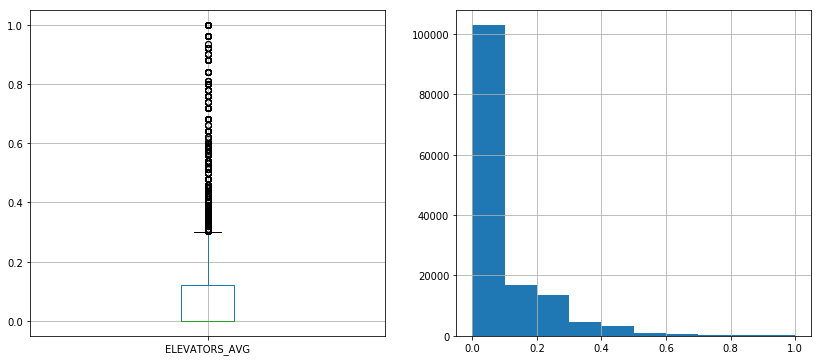

ENTRANCES_AVG is 0.0 ~ 1.0 , and median is 0.1379


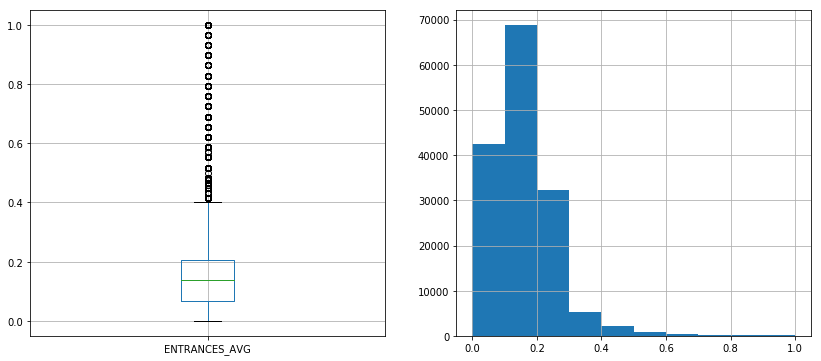

FLOORSMAX_AVG is 0.0 ~ 1.0 , and median is 0.1667


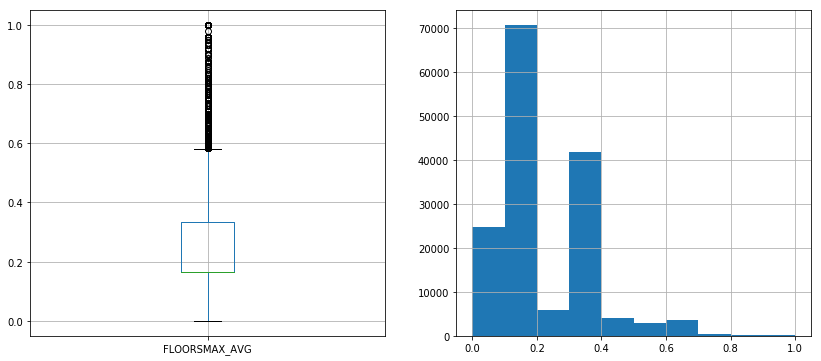

FLOORSMIN_AVG is 0.0 ~ 1.0 , and median is 0.2083


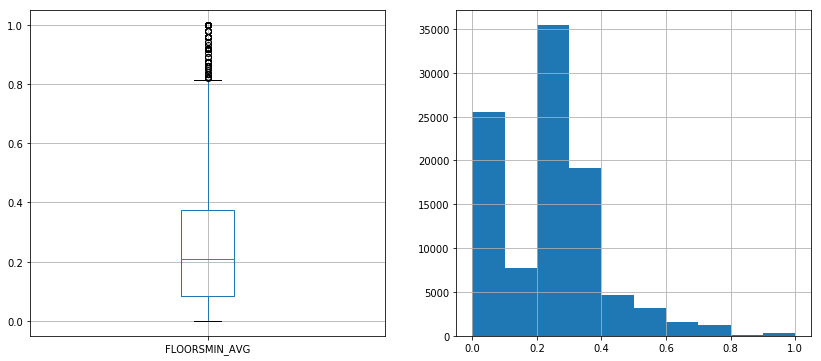

LANDAREA_AVG is 0.0 ~ 1.0 , and median is 0.0481


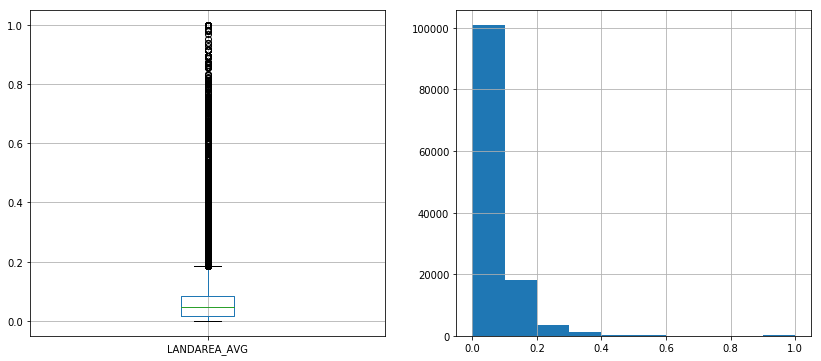

LIVINGAPARTMENTS_AVG is 0.0 ~ 1.0 , and median is 0.0756


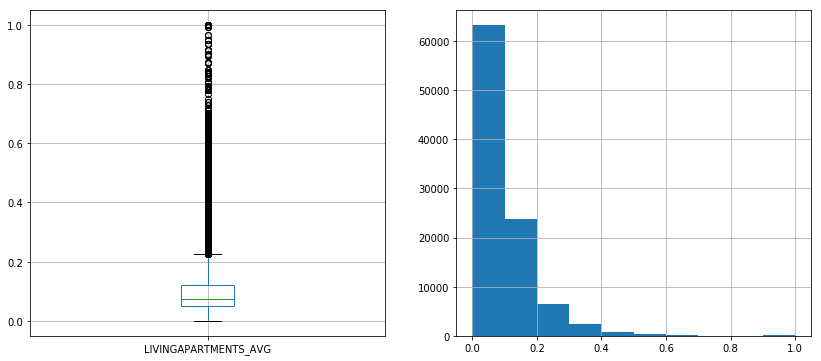

LIVINGAREA_AVG is 0.0 ~ 1.0 , and median is 0.0745


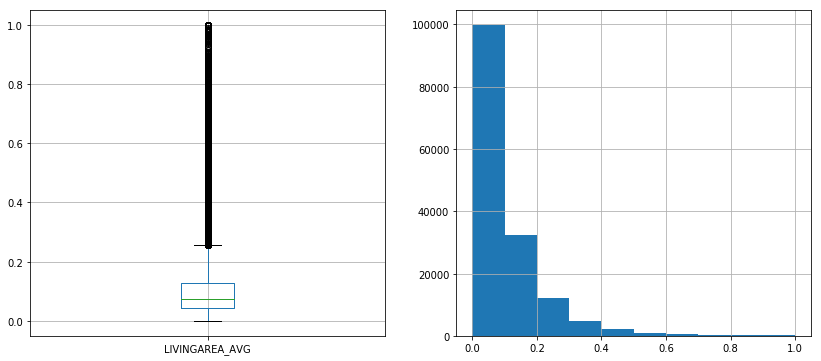

NONLIVINGAPARTMENTS_AVG is 0.0 ~ 1.0 , and median is 0.0


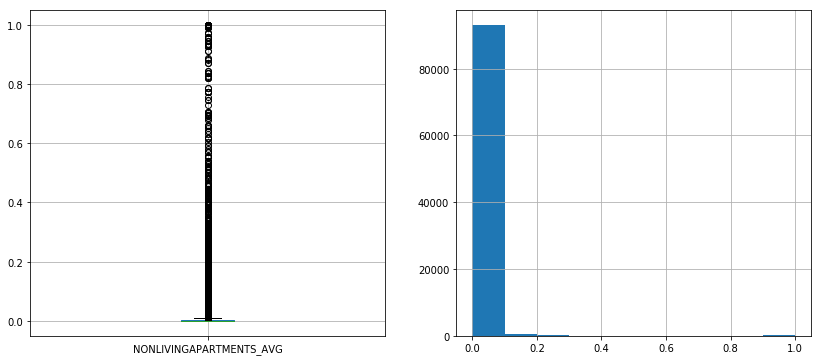

NONLIVINGAREA_AVG is 0.0 ~ 1.0 , and median is 0.0036


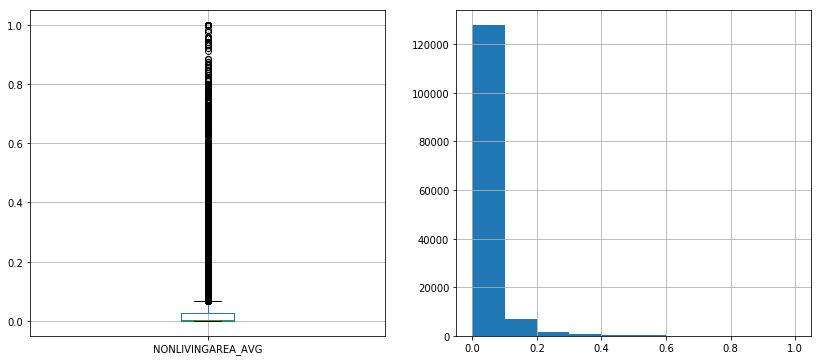

APARTMENTS_MODE is 0.0 ~ 1.0 , and median is 0.084


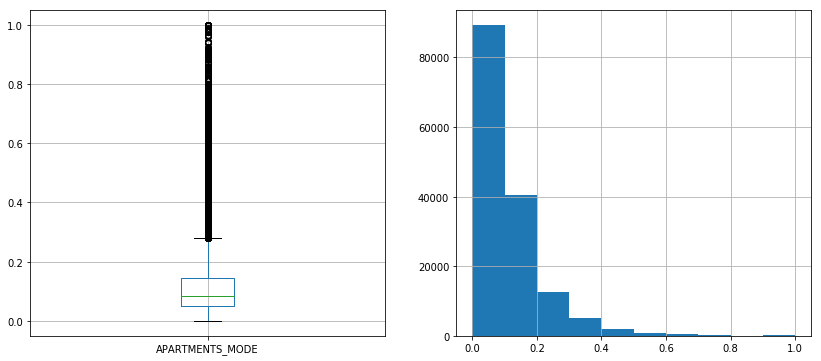

BASEMENTAREA_MODE is 0.0 ~ 1.0 , and median is 0.0746


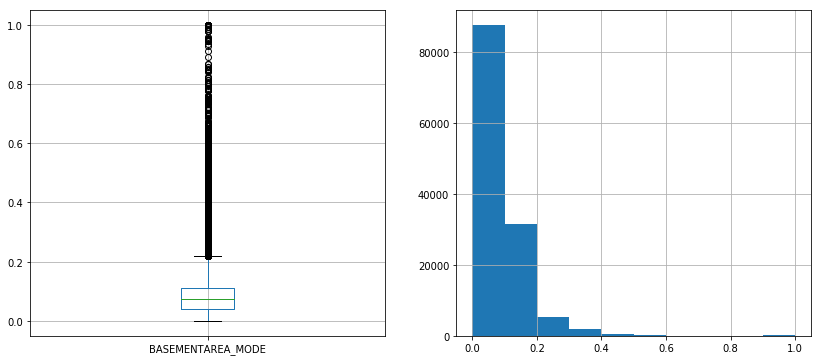

YEARS_BEGINEXPLUATATION_MODE is 0.0 ~ 1.0 , and median is 0.9816


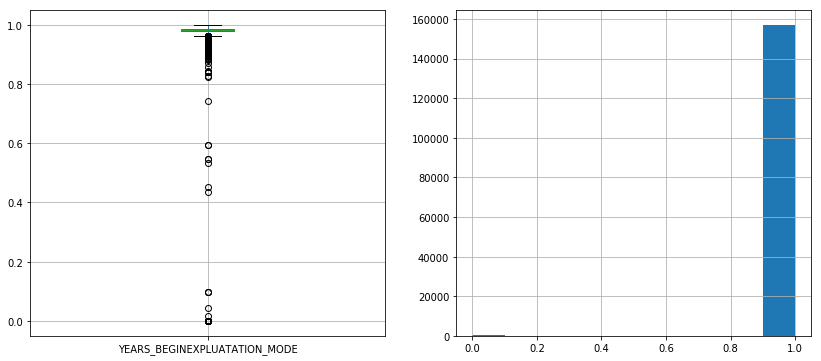

YEARS_BUILD_MODE is 0.0 ~ 1.0 , and median is 0.7648


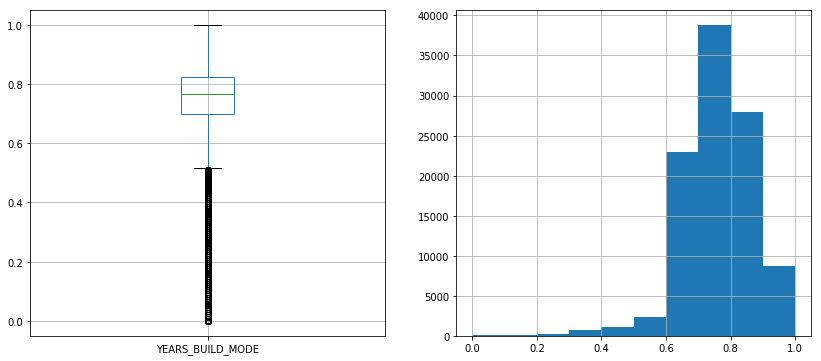

COMMONAREA_MODE is 0.0 ~ 1.0 , and median is 0.019


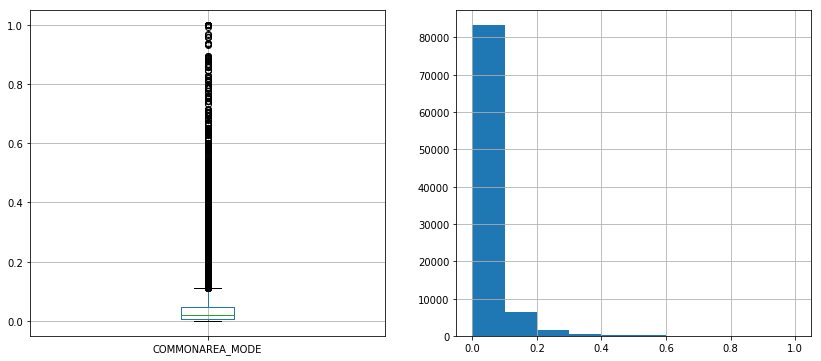

ELEVATORS_MODE is 0.0 ~ 1.0 , and median is 0.0


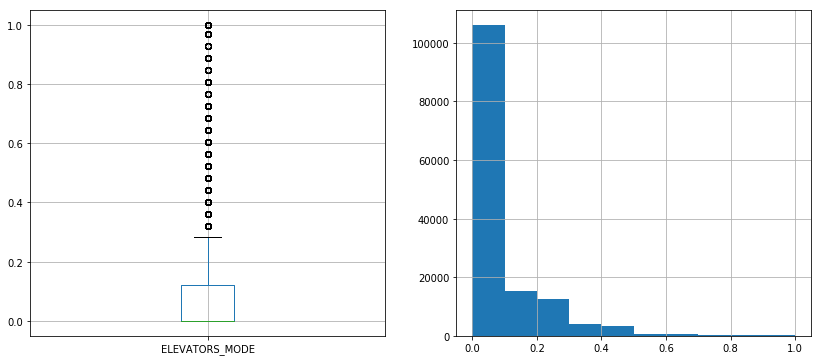

ENTRANCES_MODE is 0.0 ~ 1.0 , and median is 0.1379


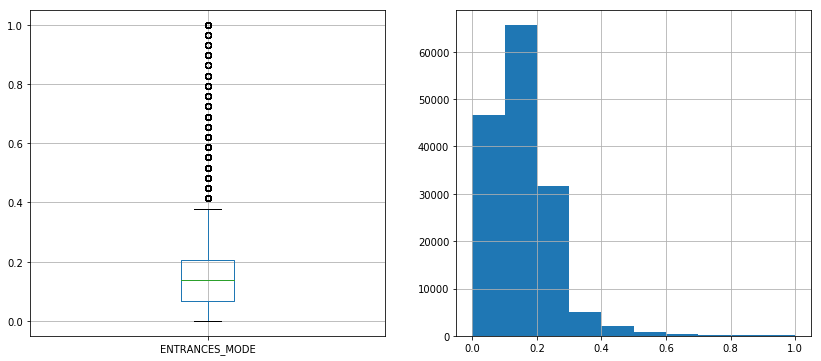

FLOORSMAX_MODE is 0.0 ~ 1.0 , and median is 0.1667


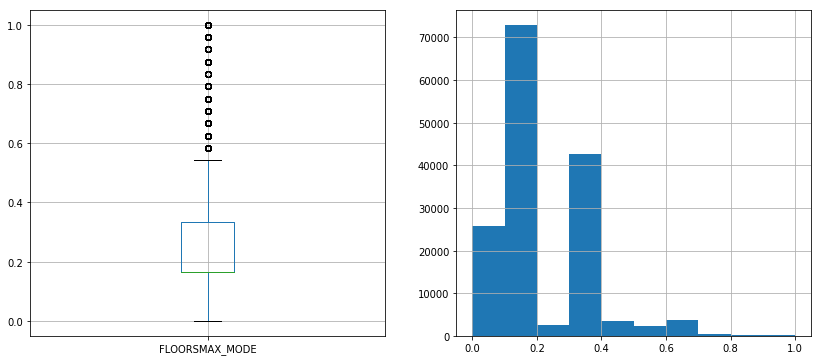

FLOORSMIN_MODE is 0.0 ~ 1.0 , and median is 0.2083


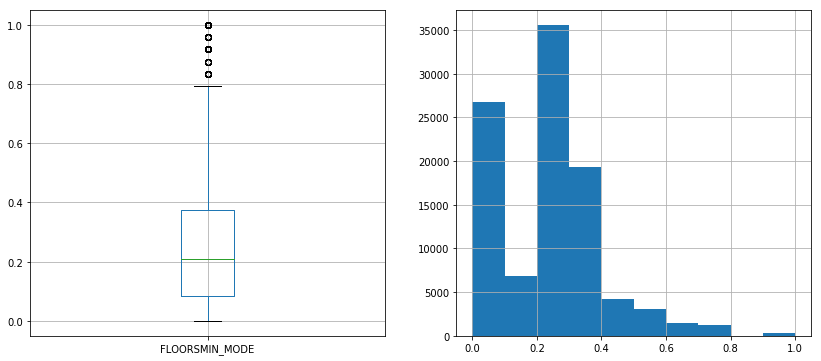

LANDAREA_MODE is 0.0 ~ 1.0 , and median is 0.0458


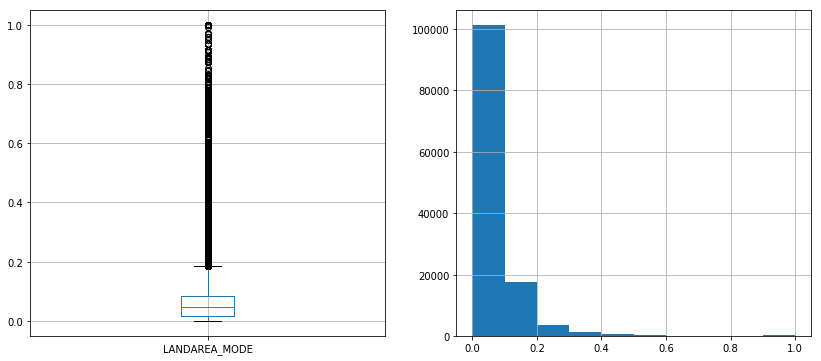

LIVINGAPARTMENTS_MODE is 0.0 ~ 1.0 , and median is 0.0771


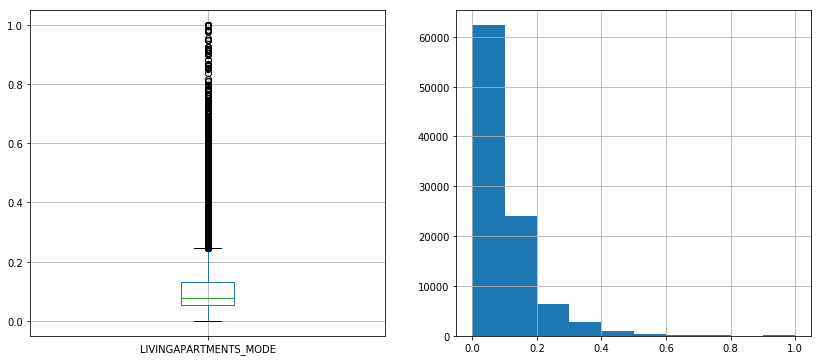

LIVINGAREA_MODE is 0.0 ~ 1.0 , and median is 0.0731


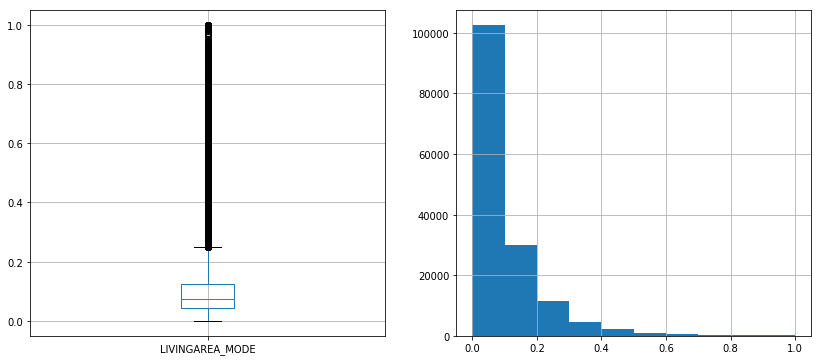

NONLIVINGAPARTMENTS_MODE is 0.0 ~ 1.0 , and median is 0.0


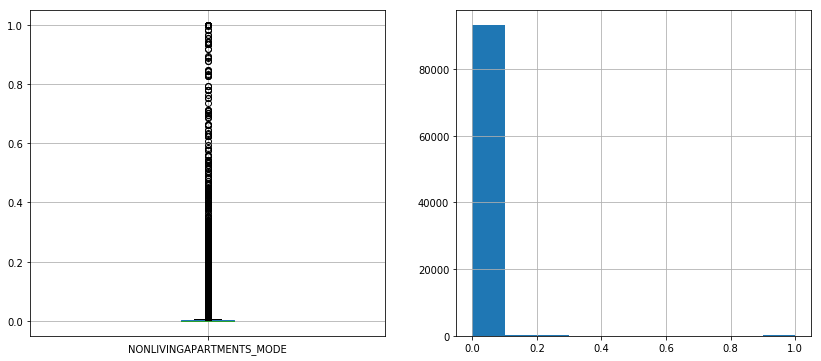

NONLIVINGAREA_MODE is 0.0 ~ 1.0 , and median is 0.0011


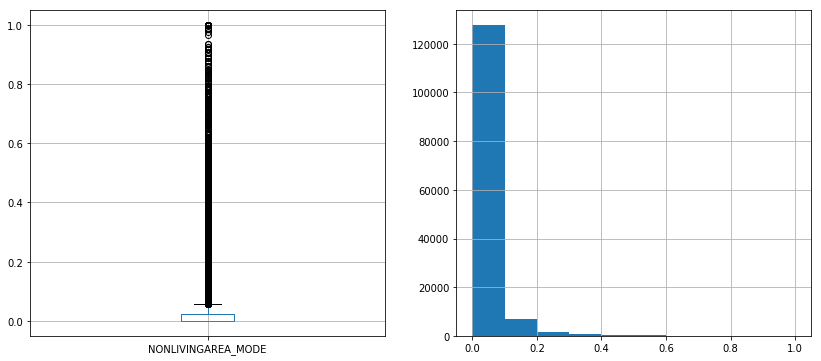

APARTMENTS_MEDI is 0.0 ~ 1.0 , and median is 0.0864


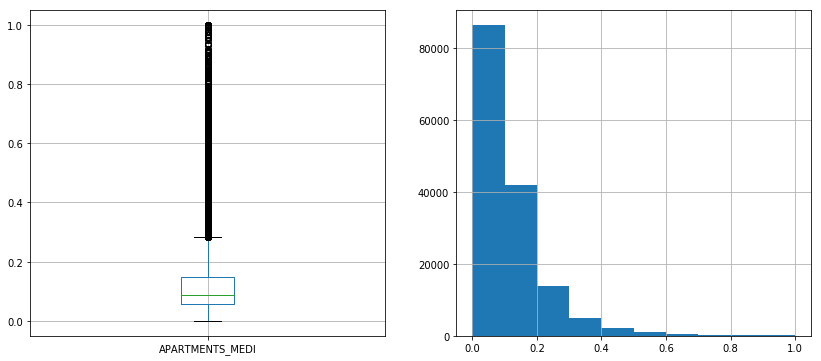

BASEMENTAREA_MEDI is 0.0 ~ 1.0 , and median is 0.0758


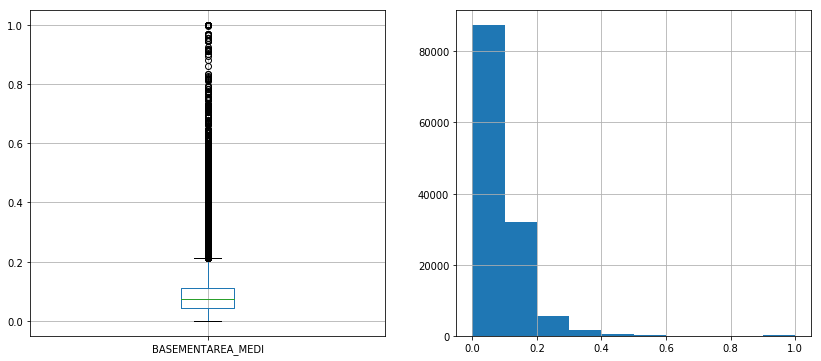

YEARS_BEGINEXPLUATATION_MEDI is 0.0 ~ 1.0 , and median is 0.9816


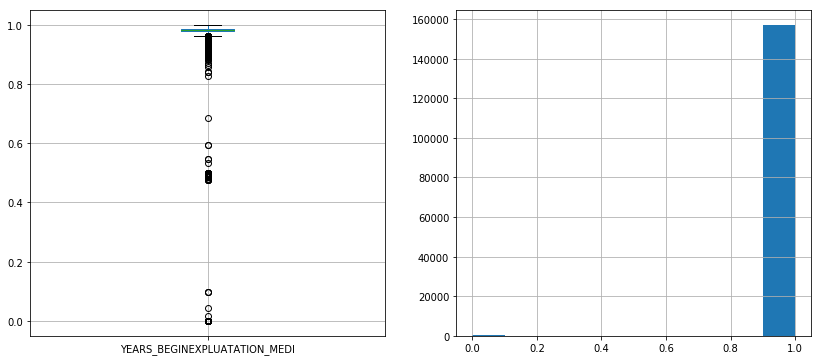

YEARS_BUILD_MEDI is 0.0 ~ 1.0 , and median is 0.7585


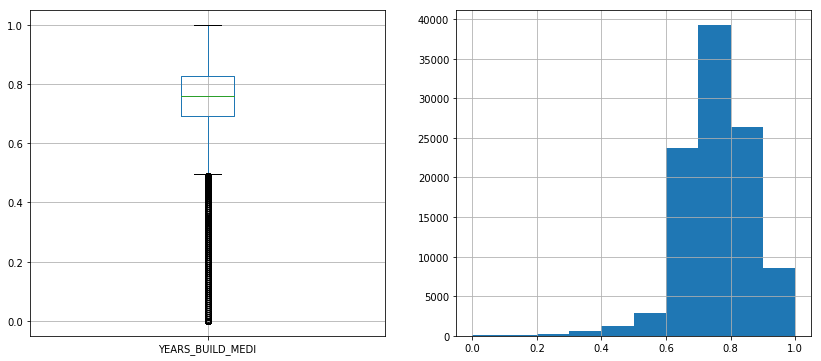

COMMONAREA_MEDI is 0.0 ~ 1.0 , and median is 0.0208


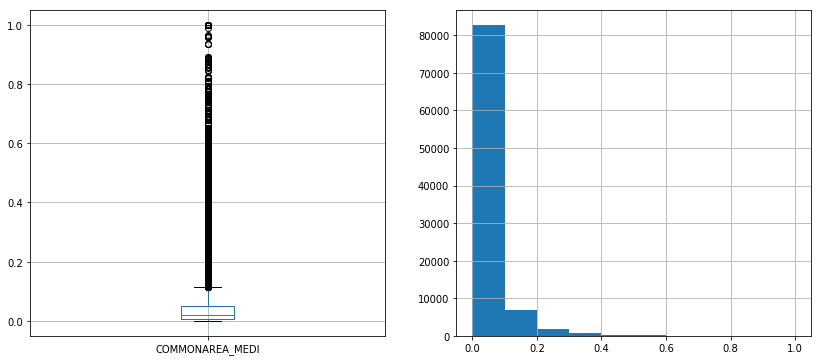

ELEVATORS_MEDI is 0.0 ~ 1.0 , and median is 0.0


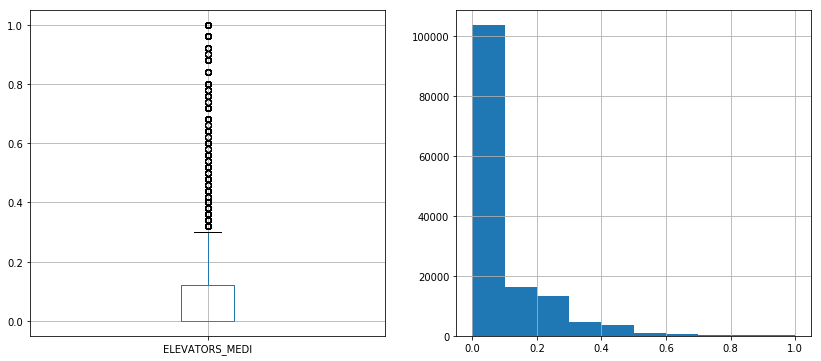

ENTRANCES_MEDI is 0.0 ~ 1.0 , and median is 0.1379


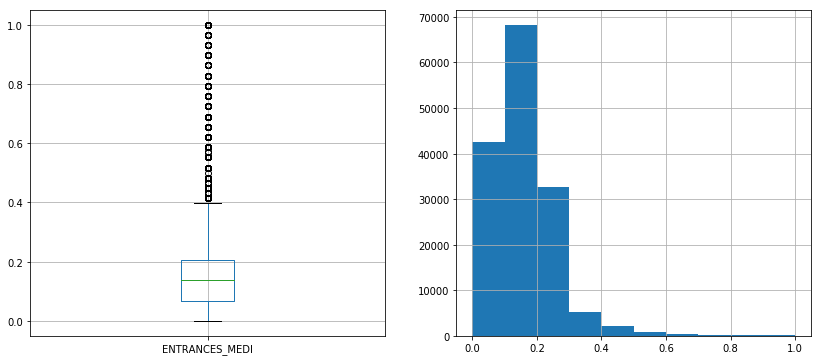

FLOORSMAX_MEDI is 0.0 ~ 1.0 , and median is 0.1667


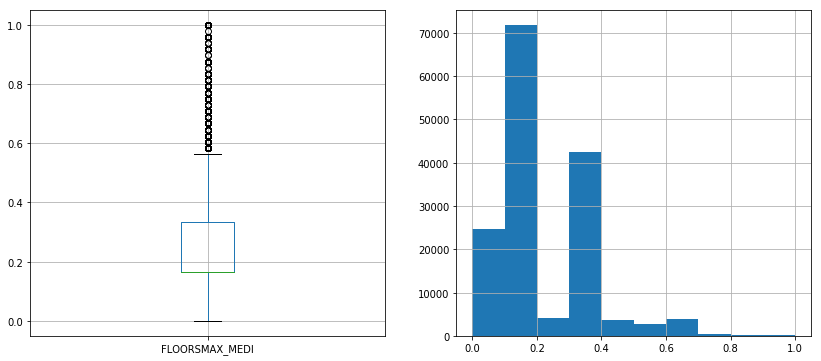

FLOORSMIN_MEDI is 0.0 ~ 1.0 , and median is 0.2083


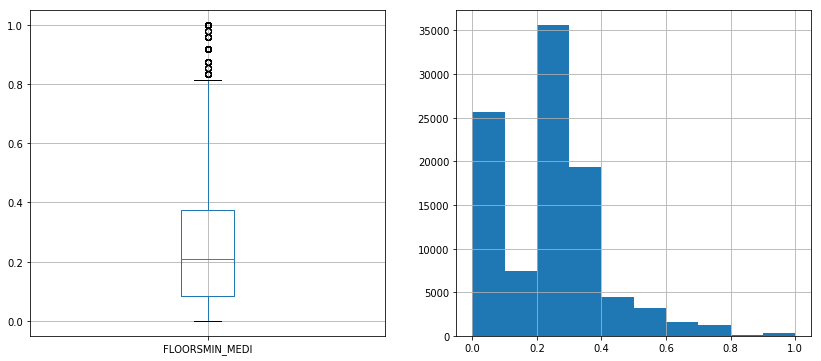

LANDAREA_MEDI is 0.0 ~ 1.0 , and median is 0.0487


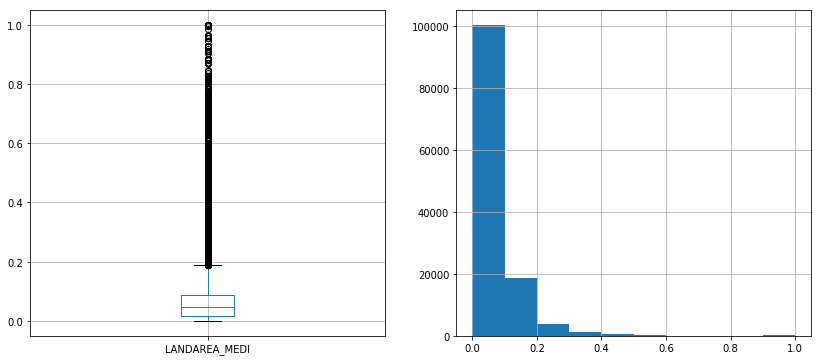

LIVINGAPARTMENTS_MEDI is 0.0 ~ 1.0 , and median is 0.0761


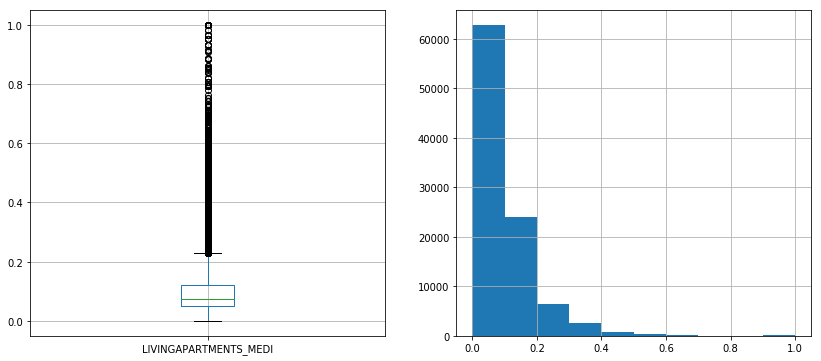

LIVINGAREA_MEDI is 0.0 ~ 1.0 , and median is 0.0749


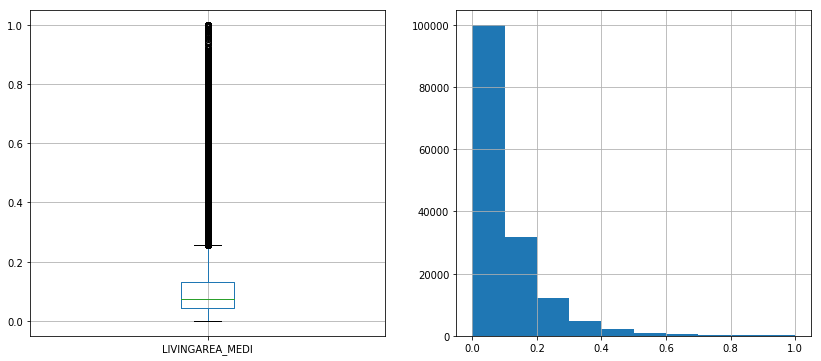

NONLIVINGAPARTMENTS_MEDI is 0.0 ~ 1.0 , and median is 0.0


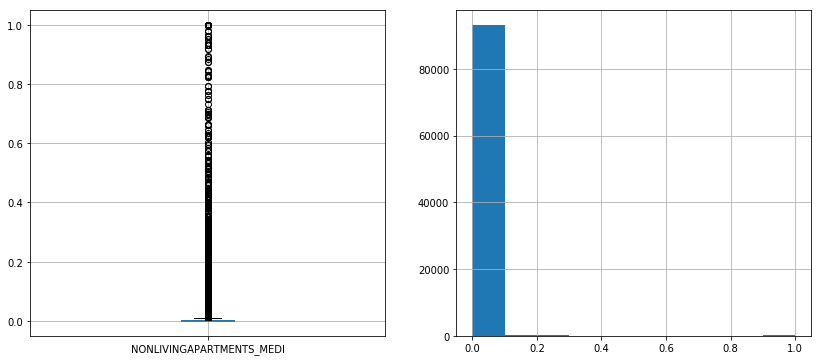

NONLIVINGAREA_MEDI is 0.0 ~ 1.0 , and median is 0.0031


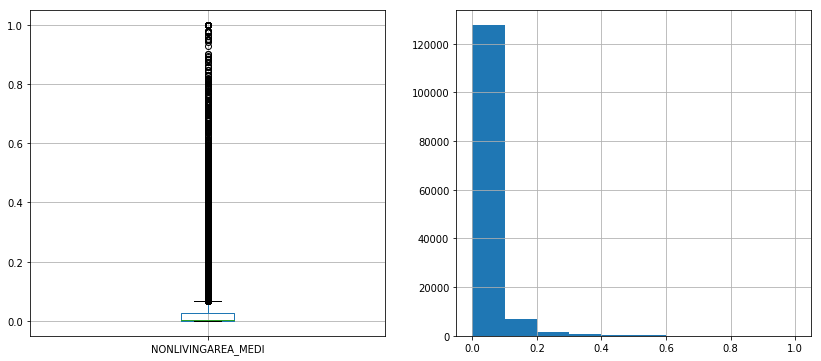

TOTALAREA_MODE is 0.0 ~ 1.0 , and median is 0.0688


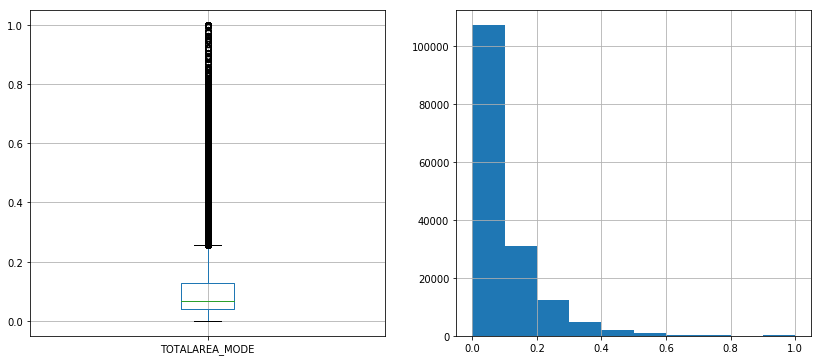

OBS_30_CNT_SOCIAL_CIRCLE is 0.0 ~ 348.0 , and median is 0.0


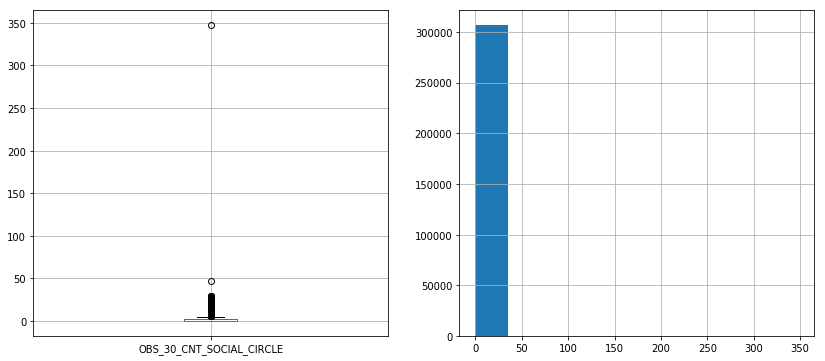

DEF_30_CNT_SOCIAL_CIRCLE is 0.0 ~ 34.0 , and median is 0.0


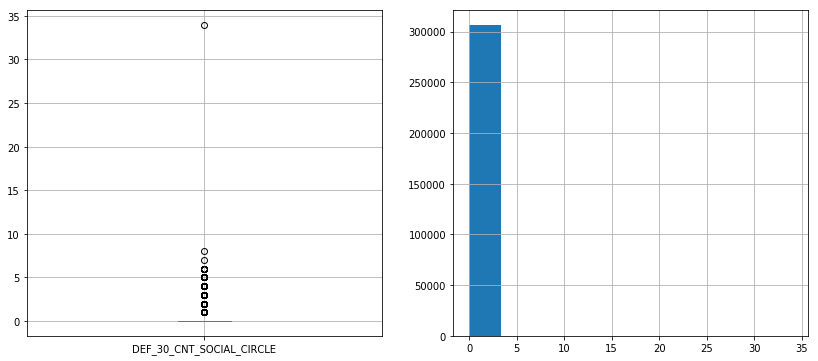

OBS_60_CNT_SOCIAL_CIRCLE is 0.0 ~ 344.0 , and median is 0.0


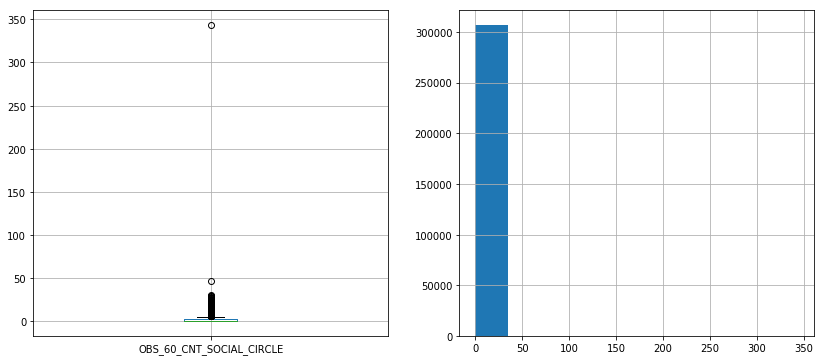

DEF_60_CNT_SOCIAL_CIRCLE is 0.0 ~ 24.0 , and median is 0.0


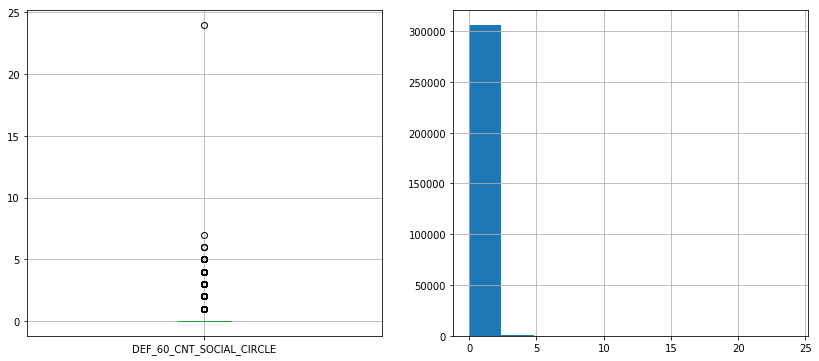

DAYS_LAST_PHONE_CHANGE is -4292.0 ~ 0.0 , and median is -757.0


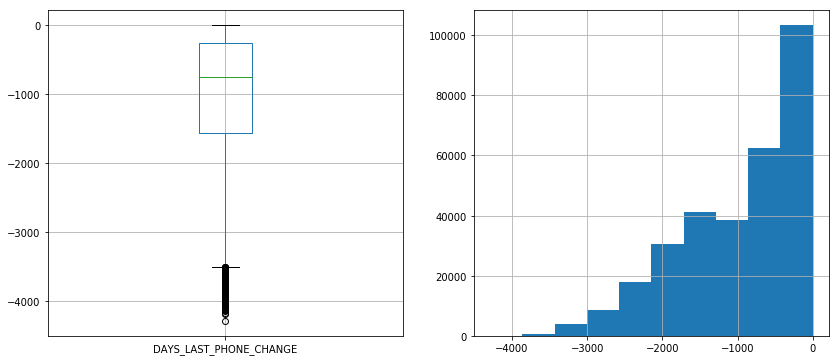

AMT_REQ_CREDIT_BUREAU_HOUR is 0.0 ~ 4.0 , and median is 0.0


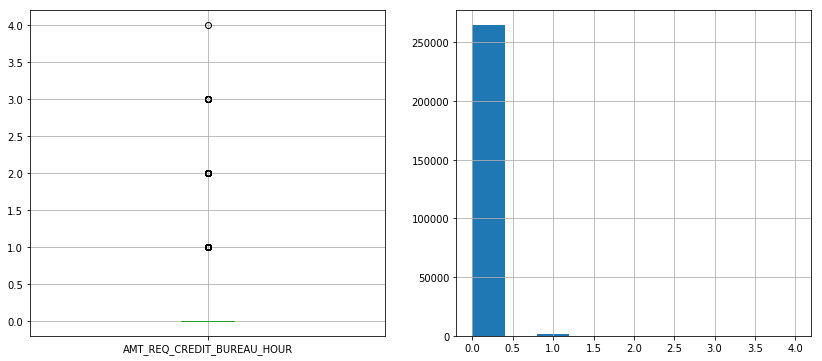

AMT_REQ_CREDIT_BUREAU_DAY is 0.0 ~ 9.0 , and median is 0.0


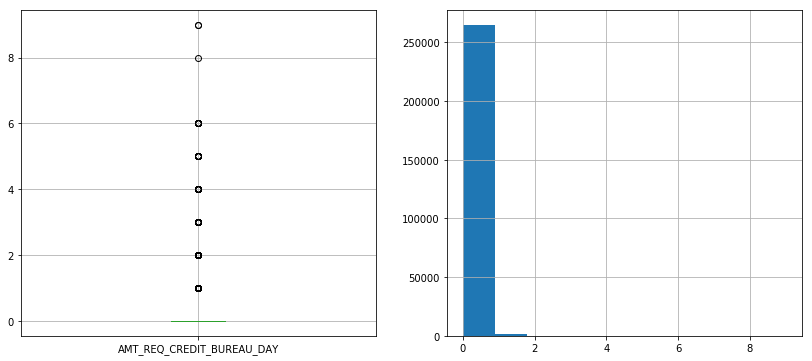

AMT_REQ_CREDIT_BUREAU_WEEK is 0.0 ~ 8.0 , and median is 0.0


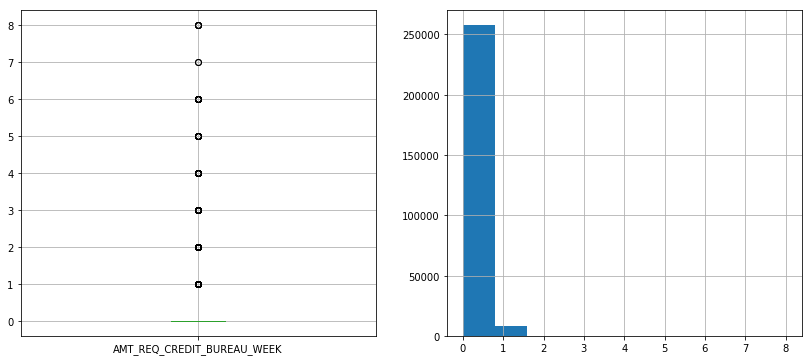

AMT_REQ_CREDIT_BUREAU_MON is 0.0 ~ 27.0 , and median is 0.0


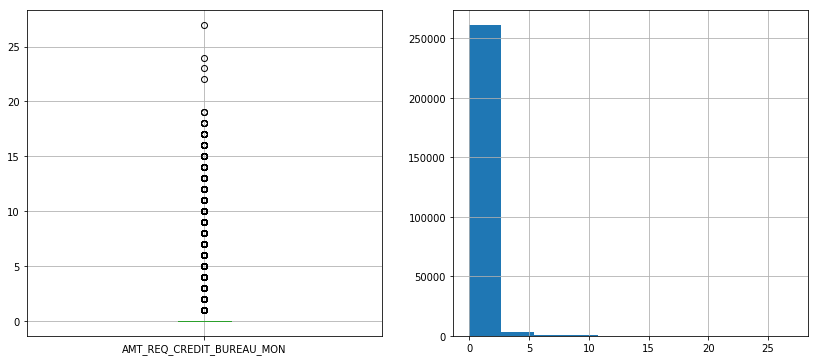

AMT_REQ_CREDIT_BUREAU_QRT is 0.0 ~ 261.0 , and median is 0.0


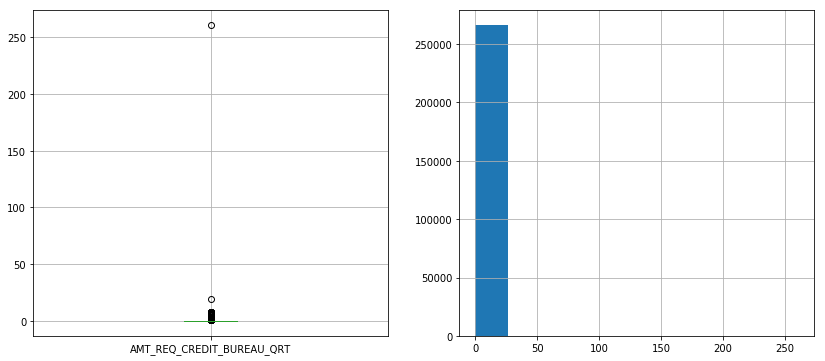

AMT_REQ_CREDIT_BUREAU_YEAR is 0.0 ~ 25.0 , and median is 1.0


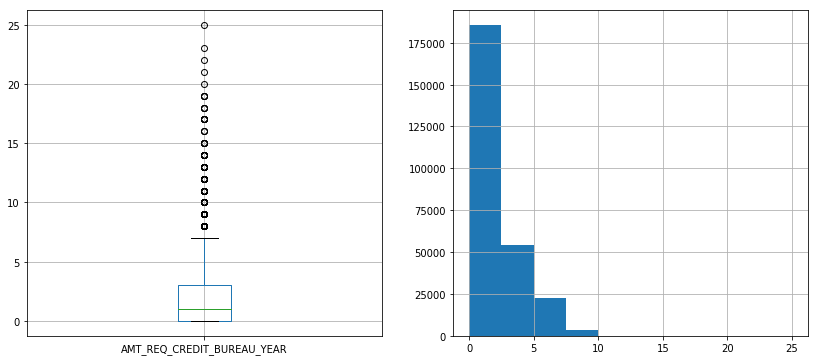

In [7]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [float, int]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %s" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    """
    Your CODE HERE, make the box plot
    """
    maximum = app_train[col].max()
    minimum = app_train[col].min()
    median = app_train[col].median()
    print('{column} is {minn} ~ {maxx} , and median is {med}'.format(column=col, minn=minimum, maxx=maximum, med=median))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    plt.subplot(1,2,1)
    app_train.boxplot(column=col)
    plt.subplot(1,2,2)
    app_train[col].hist()
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16abb9e48>,
      dtype=object)

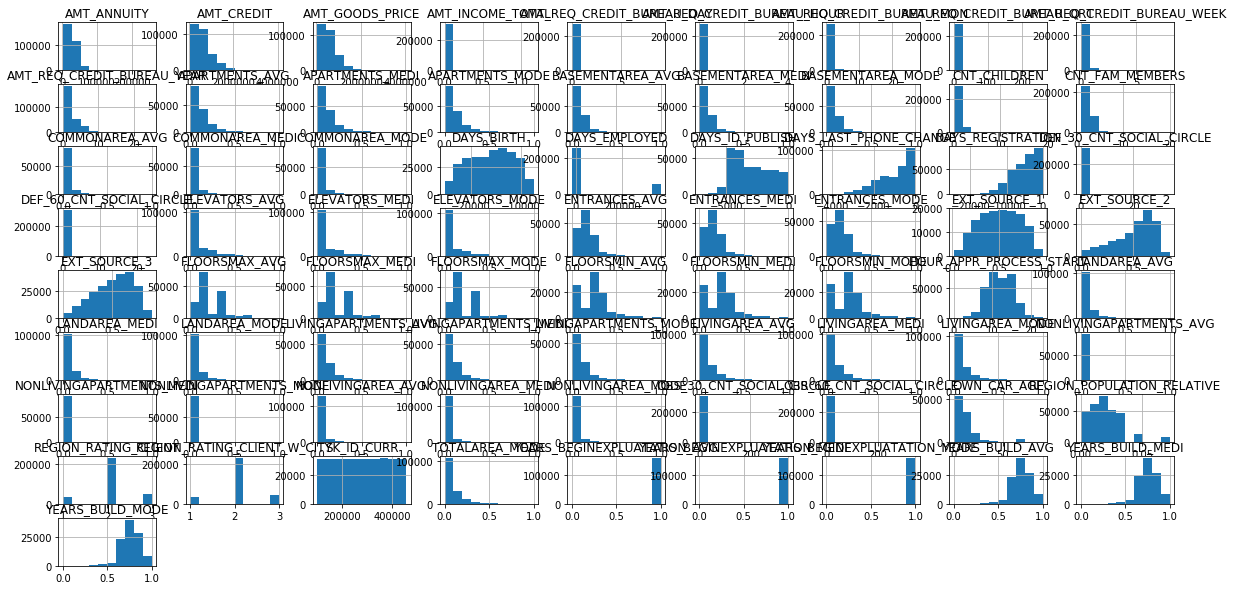

In [36]:
app_train[numeric_columns].hist(figsize=(20,10))

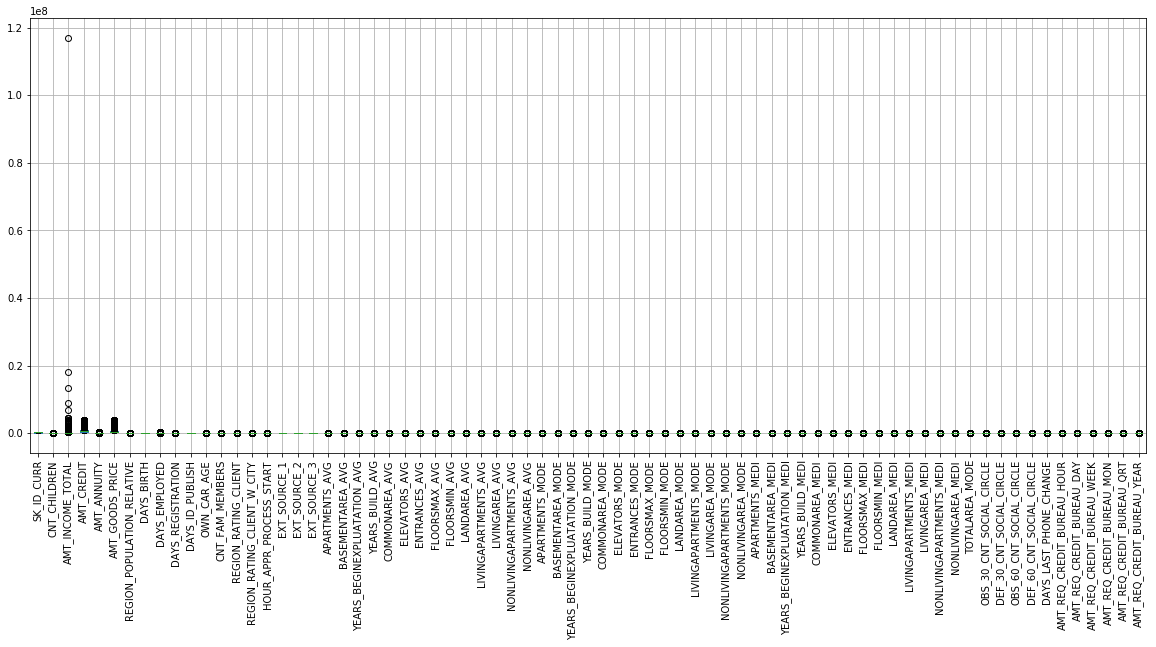

In [8]:
app_train.boxplot(column=numeric_columns, rot=90, fontsize=10, figsize=(20,8))

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

#### Cumulative Distribution Function (CDF) 
the percentage or relative count of the sorted numbers is plotted over the numbers themselves. This is more or less the integral of the histogram.



https://www.andata.at/en/software-blog-reader/why-we-love-the-cdf-and-do-not-like-histograms-that-much.html

In [120]:

income_sort = app_train.AMT_INCOME_TOTAL.sort_values()
lst_income_sort = list(income_sort)
cdf = [(idx, lst_income_sort[i]+sum(lst_income_sort[0:i])) for i,(idx,x) in enumerate(zip(income_sort.index, income_sort))]

In [ ]:
income_sort = app_train.AMT_INCOME_TOTAL.sort_values()
for i,(idx,x) in enumerate(zip(income_sort.index, income_sort)):
    print(i, idx, x)

In [145]:
app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()

25650.0             2
26100.0             5
26460.0             6
26550.0             8
27000.0            74
27585.0            75
27900.0            82
27967.5            83
28161.0            84
28350.0            95
28404.0            96
28575.0            99
28593.0           100
28723.5           101
28800.0           104
29133.0           105
29250.0           137
29583.0           138
29700.0           141
30150.0           148
30600.0           154
30915.0           155
31050.0           156
31500.0           340
31531.5           341
31815.0           342
31860.0           343
31950.0           347
31990.5           348
32040.0           349
                ...  
1358550.0      307423
1381500.0      307424
1417500.0      307425
1440000.0      307427
1530000.0      307428
1575000.0      307446
1665000.0      307447
1755000.0      307448
1800000.0      307462
1890000.0      307466
1935000.0      307467
2025000.0      307475
2070000.0      307476
2160000.0      307477
2214117.0 

In [94]:
income_sort[0:3]

1678      25650.0
20727     25650.0
240137    26100.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [116]:
list(income_sort)[0]

25650.0

In [101]:
income_sort[0:2].sum()

51300.0

In [119]:
sum(list(income_sort)[0:2])+list(income_sort)[2]

77400.0

In [122]:
cdf[-1]

(12840, 51907216960.935)

In [125]:
income_sort

1678          25650.0
20727         25650.0
240137        26100.0
186643        26100.0
246104        26100.0
132707        26460.0
262748        26550.0
175433        26550.0
4735          27000.0
187572        27000.0
292142        27000.0
124146        27000.0
125059        27000.0
10585         27000.0
62585         27000.0
173546        27000.0
83674         27000.0
267037        27000.0
90900         27000.0
277924        27000.0
232535        27000.0
163569        27000.0
133737        27000.0
299307        27000.0
205513        27000.0
162772        27000.0
239654        27000.0
199006        27000.0
36856         27000.0
293194        27000.0
             ...     
29737       2250000.0
74781       2250000.0
71637       2250000.0
81185       2250000.0
55329       2250000.0
10222       2250000.0
278212      2250000.0
206814      2250000.0
201855      2250000.0
145673      2250000.0
298082      2475000.0
258773      2700000.0
107926      2930026.5
101007      3150000.0
248159    

In [129]:
income_sort.cumsum().index

Int64Index([  1678,  20727, 240137, 186643, 246104, 132707, 262748, 175433,
              4735, 187572,
            ...
            181698, 287463, 187833, 103006, 204564, 131127,  77768, 246858,
            203693,  12840],
           dtype='int64', length=307511)

In [126]:
[x for i, x in cdf]

[25650.0,
 51300.0,
 77400.0,
 103500.0,
 129600.0,
 156060.0,
 182610.0,
 209160.0,
 236160.0,
 263160.0,
 290160.0,
 317160.0,
 344160.0,
 371160.0,
 398160.0,
 425160.0,
 452160.0,
 479160.0,
 506160.0,
 533160.0,
 560160.0,
 587160.0,
 614160.0,
 641160.0,
 668160.0,
 695160.0,
 722160.0,
 749160.0,
 776160.0,
 803160.0,
 830160.0,
 857160.0,
 884160.0,
 911160.0,
 938160.0,
 965160.0,
 992160.0,
 1019160.0,
 1046160.0,
 1073160.0,
 1100160.0,
 1127160.0,
 1154160.0,
 1181160.0,
 1208160.0,
 1235160.0,
 1262160.0,
 1289160.0,
 1316160.0,
 1343160.0,
 1370160.0,
 1397160.0,
 1424160.0,
 1451160.0,
 1478160.0,
 1505160.0,
 1532160.0,
 1559160.0,
 1586160.0,
 1613160.0,
 1640160.0,
 1667160.0,
 1694160.0,
 1721160.0,
 1748160.0,
 1775160.0,
 1802160.0,
 1829160.0,
 1856160.0,
 1883160.0,
 1910160.0,
 1937160.0,
 1964160.0,
 1991160.0,
 2018745.0,
 2046645.0,
 2074545.0,
 2102445.0,
 2130345.0,
 2158245.0,
 2186145.0,
 2214045.0,
 2242012.5,
 2270173.5,
 2298523.5,
 2326873.5,
 2355223

In [162]:
import statsmodels.api as sm
ecdf = sm.distributions.ECDF(income_sort)

In [164]:
# 發生值
ecdf.x

array([        -inf, 2.565000e+04, 2.565000e+04, ..., 1.350000e+07,
       1.800009e+07, 1.170000e+08])

In [165]:
# 發生機率
ecdf.y

array([0.00000000e+00, 3.25191619e-06, 6.50383238e-06, ...,
       9.99993496e-01, 9.99996748e-01, 1.00000000e+00])

In [168]:
list(ecdf.x)[0:11]

[-inf,
 25650.0,
 25650.0,
 26100.0,
 26100.0,
 26100.0,
 26460.0,
 26550.0,
 26550.0,
 27000.0,
 27000.0]

In [169]:
list(ecdf.y)[0:11]

[0.0,
 3.2519161916159095e-06,
 6.503832383231819e-06,
 9.755748574847729e-06,
 1.3007664766463638e-05,
 1.6259580958079547e-05,
 1.9511497149695458e-05,
 2.276341334131137e-05,
 2.6015329532927276e-05,
 2.9267245724543187e-05,
 3.2519161916159095e-05]

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


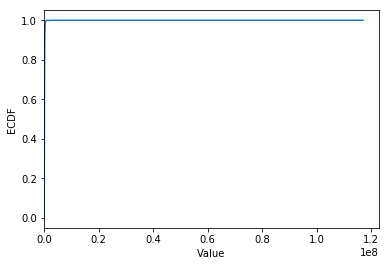

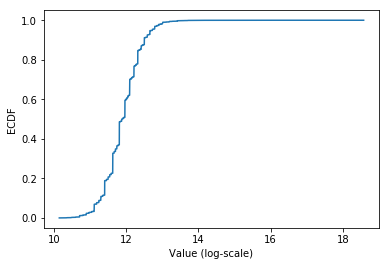

In [146]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
#cdf = 

#income_sort = app_train.AMT_INCOME_TOTAL.sort_values()
#lst_income_sort = list(income_sort)
#cdf_t = [(idx, lst_income_sort[i]+sum(lst_income_sort[0:i])) for i,(idx,x) in enumerate(zip(income_sort.index, income_sort))]

cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


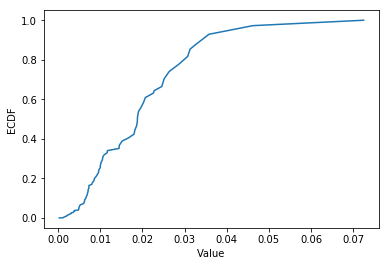

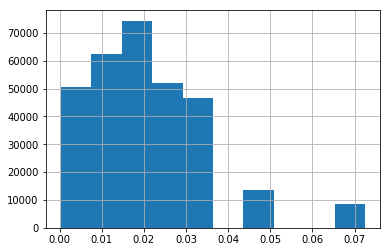

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [148]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


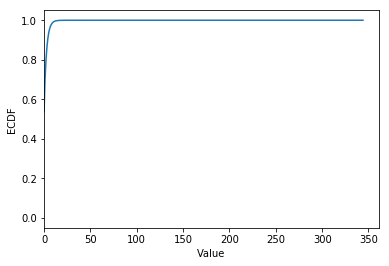

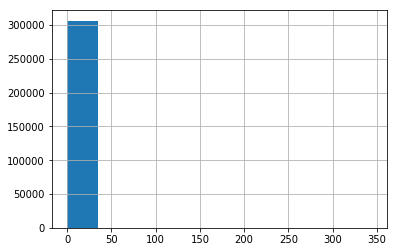

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [151]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()



plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [154]:
app_train.OBS_60_CNT_SOCIAL_CIRCLE.head()

0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [152]:
app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

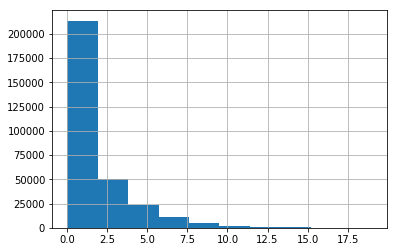

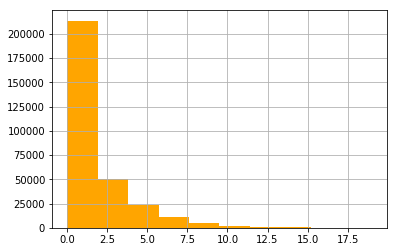

In [160]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train.OBS_60_CNT_SOCIAL_CIRCLE <20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()

app_train[app_train.OBS_60_CNT_SOCIAL_CIRCLE <20].OBS_60_CNT_SOCIAL_CIRCLE.hist(color='orange')
plt.show()

